# Assignment 1: Exploratory Data Analysis
## Group 22
- Natasa Bolic (300241734)
- Brent Palmer (300193610)
## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 1: The Influence of Demographics on Digital Consumption

### Dataset Description
**Url:** https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/data <br>
**Name:** Mobile Device Usage and User Behaviour <br>
**Author:** Seyedvala Khorasani<br>
**Purpose:** The dataset provides researchers, data scientists, and analysts an opportunity to develop predictive models based on mobile user behaviour. The author specifies that the dataset is intended to be an educational resource for machine learning algorithms and emphasizes that it must not be treated as a 
reliable source.<br>
**Shape:** There are 700 rows and 11 columns. (700,11) <br>
**Features:** 
- `User ID` (category): Uniquely identifies each user.
- `Device Model` (category): The model name of the user's phone.
- `Operating System` (category): The operating system of the user's phone (Android or iOS).
- `App Usage Time (min/day)` (numerical): The user's daily time spent on apps (mins).
- `Screen On Time (hours/day)` (numerical): The user's daily time with an active screen (hours).
- `Battery Drain (mAh/day)` (numerical): The user's daily battery consumption (mAh).
- `Number of Apps Installed` (numerical): The number of apps the user has installed.
- `Data Usage (MB/day)` (numerical): The average data usage per day of the user (MB).
- `Age` (numerical): The age of the user.
- `Gender` (categorical): The gender of the user.
- `User Behavior Class` (categorical): Class of user behaviour from 1 (light usage) to 5 (extreme usage).

**Redundancy:** There is no redundancy in the dataset. Each row has a unique user ID in the first column. To check if there are any duplicate rows excluding the user ID, you can provide the `.duplicated()` method all of the other columns as follows: `data.duplicated(subset=data.columns[1:]).any()`. This will return `True` if any rows are duplicated. Since it returns `False`, there is no redundancy. <br>
**Missing Values:** There are no missing values in the dataset. The method `data.isnull().sum()` will return the number of missing values in each column. Since the total is 0 for each column, there are no missing values.

## Dataset Overview (in Code)

### Extract the Dataset (Mobile Device Usage and User Behaviour)

In [12]:
url = "https://raw.githubusercontent.com/BrentMRPalmer/mobile-data/refs/heads/main/user_behavior_dataset.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
data.shape

(700, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [7]:
data.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

### Checking for Missing Values
https://www.atlassian.com/data/notebook/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

In [8]:
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

### Checking for Duplicates
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

In [9]:
data.duplicated(subset=data.columns[1:]).any()

False

## Insights

### Insight 1:

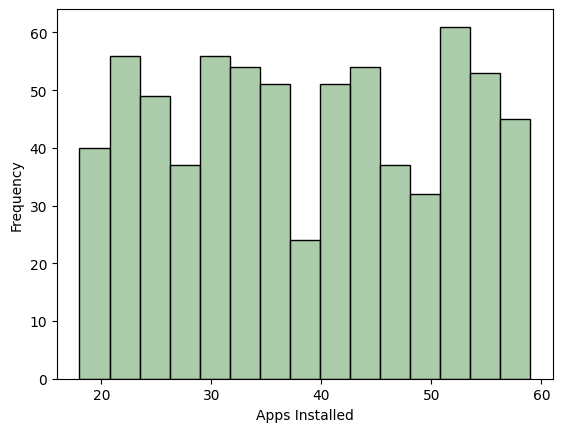

In [17]:
# Create a histogram of valence
sns.histplot(data=data, x="Age", bins=15, color="darkseagreen")

# Label the histogram
plt.xlabel('Apps Installed')
plt.ylabel('Frequency')
plt.title('')

plt.show()

### Insight 2:

### Insight 3:

### Insight 4:

### Insight 5:

### Insight 6: r6 - use the scatterplot to highlight correlation

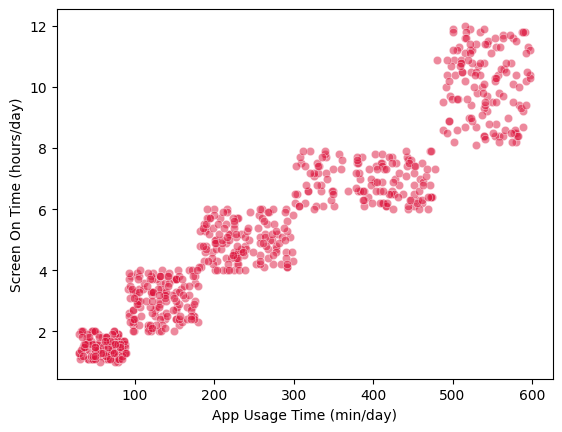

In [16]:
sns.scatterplot(data=data, x="App Usage Time (min/day)", y="Screen On Time (hours/day)", alpha=0.5, color="crimson")

plt.show()

### Insight 7:

### Insight 8:

### Insight 9:

### Insight 10:

In [ ]:
numeric_df = data.select_dtypes(include="number")

# Compute correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Display correlation matrix
print(corr_matrix)